In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Part 1: Load the data and prepare df

In [3]:
filepath = 'D:/Projects/fiji-training-2024/notebooks/day_06/V88054_obs_subdaily.csv'
df = pd.read_csv(filepath,sep=',',encoding='latin1',skiprows=[1])
df

,station_no,lsd,time,air_temp,wet_bulb,dew_point,rel_humidity,rain_3h,msl_pres,wind_speed,wind_dir
0,V88054,2014-01-01,00:00,24.7,24.5,24.4,98.0,0.0,1007.0,0.000000,0.0
1,V88054,2014-01-01,01:00,25.0,NaN,24.0,NaN,0.0,1006.0,0.000000,0.0
2,V88054,2014-01-01,02:00,25.0,NaN,24.0,NaN,0.0,1006.0,0.000000,0.0
3,V88054,2014-01-01,03:00,24.6,24.5,24.5,99.0,0.0,1004.7,0.000000,0.0
4,V88054,2014-01-01,04:00,25.0,NaN,25.0,NaN,0.0,1004.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
87643,V88054,2023-12-31,19:00,27.5,26.0,25.4,88.0,0.0,1014.8,4.115552,100.0
87644,V88054,2023-12-31,20:00,27.0,26.0,25.6,92.0,0.0,1014.9,5.144440,100.0
87645,V88054,2023-12-31,21:00,27.0,25.5,24.9,88.0,0.0,1015.3,4.115552,100.0
87646,V88054,2023-12-31,22:00,27.1,25.1,24.2,84.0,0.0,1015.7,4.629996,100.0


In [4]:
# prepare a datetime column
df['datetime'] = pd.to_datetime(df['lsd']+' '+df['time'])

# set datetime column as index so we have a timeseries dataframe
df.set_index('datetime',inplace=True)

df

,station_no,lsd,time,air_temp,wet_bulb,dew_point,rel_humidity,rain_3h,msl_pres,wind_speed,wind_dir
datetime,,,,,,,,,,,
2014-01-01 00:00:00,V88054,2014-01-01,00:00,24.7,24.5,24.4,98.0,0.0,1007.0,0.000000,0.0
2014-01-01 01:00:00,V88054,2014-01-01,01:00,25.0,NaN,24.0,NaN,0.0,1006.0,0.000000,0.0
2014-01-01 02:00:00,V88054,2014-01-01,02:00,25.0,NaN,24.0,NaN,0.0,1006.0,0.000000,0.0
2014-01-01 03:00:00,V88054,2014-01-01,03:00,24.6,24.5,24.5,99.0,0.0,1004.7,0.000000,0.0
2014-01-01 04:00:00,V88054,2014-01-01,04:00,25.0,NaN,25.0,NaN,0.0,1004.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,V88054,2023-12-31,19:00,27.5,26.0,25.4,88.0,0.0,1014.8,4.115552,100.0
2023-12-31 20:00:00,V88054,2023-12-31,20:00,27.0,26.0,25.6,92.0,0.0,1014.9,5.144440,100.0
2023-12-31 21:00:00,V88054,2023-12-31,21:00,27.0,25.5,24.9,88.0,0.0,1015.3,4.115552,100.0


# Part 2 : Data analysis

We will do simple analysis for air temperature data, let's focus on that by creating a subset of dataframe containing only temperature data.

In [5]:
# make a new temperature dataframe based on complete df
df_temp = df[['air_temp']] # use double brackets to make the result still a dataframe instead of series
df_temp

,air_temp
datetime,
2014-01-01 00:00:00,24.7
2014-01-01 01:00:00,25.0
2014-01-01 02:00:00,25.0
2014-01-01 03:00:00,24.6
2014-01-01 04:00:00,25.0
...,...
2023-12-31 19:00:00,27.5
2023-12-31 20:00:00,27.0
2023-12-31 21:00:00,27.0


Make a simple analysis of temperature anomaly, we will use 2014 - 2018 (5 years) data as the baseline. Let's subset again our data to divide it into two subset; base and anomaly.

In [6]:
# Subset for base data
df_base = df_temp.loc[(df_temp.index.year >= 2014) & (df_temp.index.year<=2018)]

# Resample the data to have daily mean
df_base_daily = df_base.resample('D').mean()
df_base_daily

,air_temp
datetime,
2014-01-01,27.504167
2014-01-02,27.416667
2014-01-03,27.100000
2014-01-04,27.425000
2014-01-05,27.175000
...,...
2018-12-27,27.037500
2018-12-28,27.541667
2018-12-29,26.295833


In [7]:
# Subset for anomaly data
df_anom = df_temp.loc[(df_temp.index.year >= 2019)]

# Resample the data to have daily mean
df_anom_daily = df_anom.resample('D').mean()
df_anom_daily

,air_temp
datetime,
2019-01-01,26.858333
2019-01-02,26.812500
2019-01-03,26.204167
2019-01-04,25.758333
2019-01-05,25.720833
...,...
2023-12-27,26.620833
2023-12-28,27.550000
2023-12-29,27.512500


In [8]:
# Calculate mean for base data
mean_temp = df_base_daily.mean()
mean_temp = mean_temp.round(2)
mean_temp.item()

24.95

In [9]:
# Calculate anomaly
df_anom_daily['anomaly'] = df_anom_daily['air_temp'] - mean_temp.item()
df_anom_daily

,air_temp,anomaly
datetime,,
2019-01-01,26.858333,1.908333
2019-01-02,26.812500,1.862500
2019-01-03,26.204167,1.254167
2019-01-04,25.758333,0.808333
2019-01-05,25.720833,0.770833
...,...,...
2023-12-27,26.620833,1.670833
2023-12-28,27.550000,2.600000
2023-12-29,27.512500,2.562500


# Part 3: Visualization

C:\Users\Rifani\AppData\Local\Temp\ipykernel_8380\2615441997.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color=cmap(norm(df_anom_daily['anomaly'][i+1])),


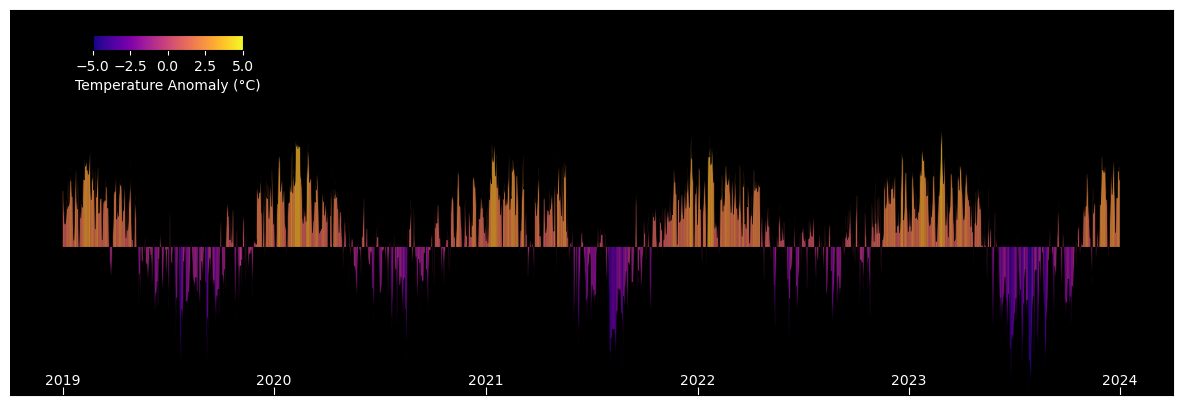

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Initiate the figure
fig,ax = plt.subplots(figsize=(15,5))

# Plot the data
ax.plot(df_anom_daily['anomaly'], linewidth=0.5, color='black', label='Anomaly')
ax.set_facecolor('black')

# Prepare the colormap
norm = mcolors.Normalize(vmin=-5, vmax=5)
cmap = plt.get_cmap('plasma')

# Fill the shade
for i in range(len(df_anom_daily) - 1):
    ax.fill_between(df_anom_daily.index[i:i+2], df_anom_daily['anomaly'][i:i+2], 0, 
                    color=cmap(norm(df_anom_daily['anomaly'][i+1])), 
                    alpha=1, edgecolor='none')

# Make space in the top to place colorbar
ax.set_ylim(-5, 8)
# Make new axes for the color bar
cbar_ax = fig.add_axes([0.18, 0.8, 0.1, 0.03])  # Position: [left, bottom, width, height]

# Color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature Anomaly (°C)', color='white')

# Set specific ticks for the colorbar
cbar.set_ticks([-5, -2.5, 0, 2.5, 5])
cbar.ax.xaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='white')

# Customize tick parameters for better readability
ax.tick_params(axis='x', colors='white', direction='in', length=6)
ax.tick_params(axis='y', colors='black')  # effectively removes the y-axis ticks by setting them to black (same as background)

# Remove y-axis line
ax.spines['left'].set_color('none')

# Customize tick labels
ax.xaxis.set_tick_params(which='both', direction='in', pad=-15)
ax.yaxis.set_visible(False)  # Remove y-axis labels and ticks

# Savefig
plt.savefig("nausori_temperature_anomaly_visualization.png", dpi=500, bbox_inches='tight', facecolor='black')

# Some Reflection
We have done some simple data analysis to find the daily temperature anomaly and do a little bit more advanced data visualization that you can use to attract more engagement from the user. If you have a closer look to the viz there are several thing that we can do to make this viz better such as:<br>
1. See the chart have some blank spaces in there, meaning that the anomaly value is 0 or really small.
2. Or there might be a missing data. You can do analysis of missing data and try to fill it with some value.
3. The chart isn't smooth, it depends on how you want to present it. It is the matter of aesthetics. But you can use some interpolation method to make it smoother, or aggregate it to a weekly mean or monthly mean or rolling mean.
4. It doesnt contain enough information, you can add Title, some caption text to tell the story of your data, maybe you can add annotation to some interesting points in the data.
5. You can also add some other information such as the mean value, the maximum value, the minimum value, etc.